In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as ss 
import seaborn as sns

# 1.	Forecast The Number of Bookings For October 2018

I will use SARIMA Model(time series) to forecast the number of bookings for october 2018.

**Why ARIMA?**
ARIMA stands for Auto Regression Integrated Moving Average and is used to forecast time series following a seasonal pattern and a trend. It is used for non-stationary series, that is, where the data do not fluctuate around the same mean, variance and co-variance. It's perfectly fit with our dataset

**Why number_week as cadence**<br>
I will use a weekly cadence in the model.<br>
If I use daily cadence, it will have too much noise and will affect model accuarcy.<br> If using a montly cadence, the number of data points will not be enough for the model.

In [28]:
#Input dataset
df = pd.read_csv("~/Desktop/forcast_week1.csv")
df.tail()

,week_number,booking_number
102,2018-35,69
103,2018-36,53
104,2018-37,51
105,2018-38,32
106,2017-53,6


Drop row 106 because it only contains one day data which is the last day of September

In [29]:
df = df.drop(labels=106, axis=0)

Check trend and seasonality of data

<AxesSubplot:>

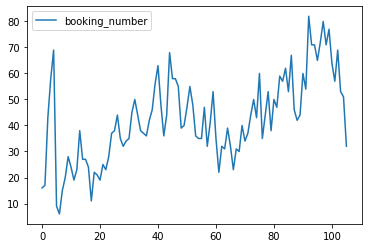

In [30]:
df.plot()

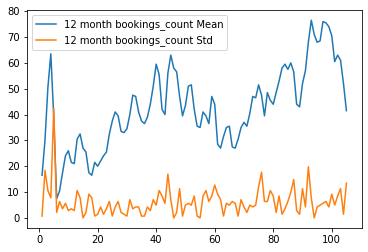

In [31]:
timeseries = df['booking_number']
timeseries.rolling(2).mean().plot(label='12 month bookings_count Mean')
timeseries.rolling(2).std().plot(label='12 month bookings_count Std')
plt.legend()

<Figure size 432x288 with 0 Axes>

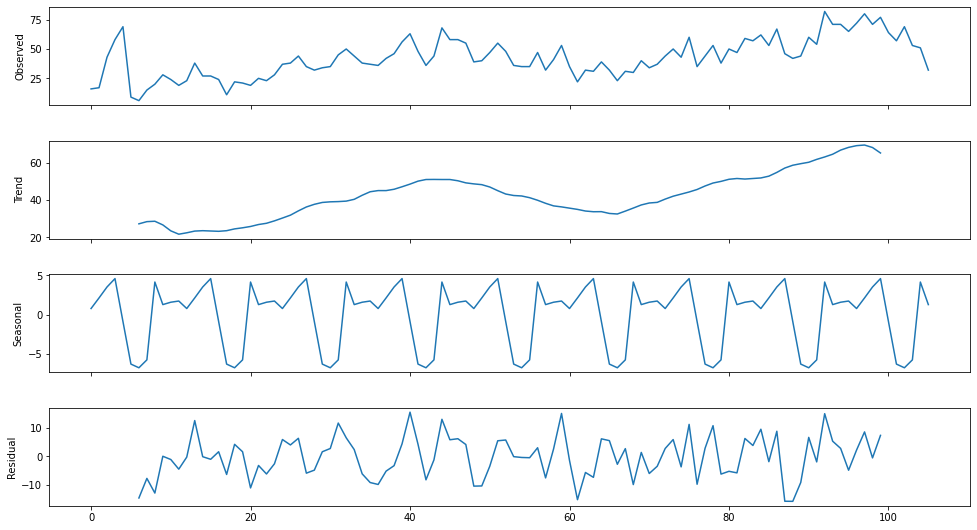

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['booking_number'], freq=12)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

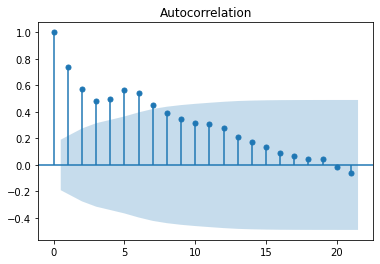

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
fig_first = plot_acf(df['booking_number'].dropna())

After Adjusting the model, **order(1,1,1), seasonal_order = (0,1,1,12)** returns the optimized result because it has the lowest AIC

order=(1,1,1), seasonal_order=(1,1,1,12) AIC = 735
**order=(1,1,1), seasonal_order=(0,1,1,12) AIC = 733**
order=(1,1,1), seasonal_order=(0,0,1,12) AIC = 805
order=(1,1,1), seasonal_order=(0,0,0,12) AIC = 804
order=(1,1,1), seasonal_order=(1,1,0,12) AIC = 743
order=(1,1,1), seasonal_order=(1,0,0,12) AIC = 805
order=(0,1,1), seasonal_order=(0,1,1,12) AIC = 738
order=(0,0,1), seasonal_order=(0,1,1,12) AIC = 765
order=(0,0,0), seasonal_order=(0,1,1,12) AIC = 800
order=(1,1,0), seasonal_order=(0,1,1,12) AIC = 740
order=(1,0,0), seasonal_order=(0,1,1,12) AIC = 730
order=(0,1,0), seasonal_order=(0,1,1,12) AIC = 742
order=(0,0,1), seasonal_order=(0,1,1,12) AIC = 765

In [34]:
model = sm.tsa.statespace.SARIMAX(df['booking_number'],order=(1,1,1), seasonal_order=(0,1,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     booking_number   No. Observations:                  106
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -362.748
Date:                            Sun, 20 Jun 2021   AIC                            733.496
Time:                                    21:30:04   BIC                            743.627
Sample:                                         0   HQIC                           737.587
                                            - 106                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4783      0.158      3.036      0.002       0.169       0.787
ma.L1         -0.8453      0.133   

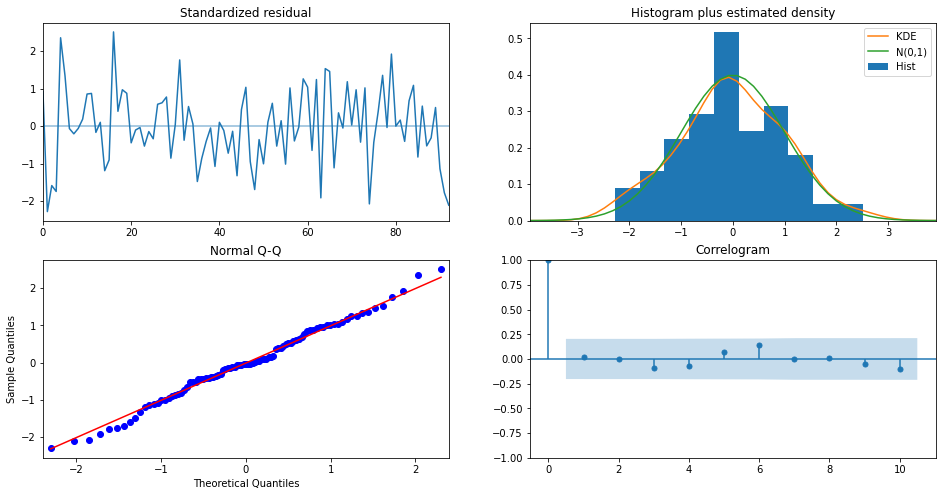

In [35]:
ARIMAresult.plot_diagnostics(figsize=(16, 8))
plt.show()

Split 80% data as traning dataset, use 20% for validation

In [36]:
validation_data = ARIMAresult.predict(start = 84, end= 105, dynamic= False)

In [37]:
validation_data

84     50.958169
85     57.894493
86     55.396145
87     69.661584
88     46.971269
89     39.564249
90     44.587218
91     54.440790
92     60.125761
93     71.023223
94     69.186811
95     69.655828
96     64.319857
97     67.644695
98     80.409086
99     70.941575
100    70.025714
101    60.595639
102    63.371381
103    65.984310
104    71.241380
105    56.029240
dtype: float64

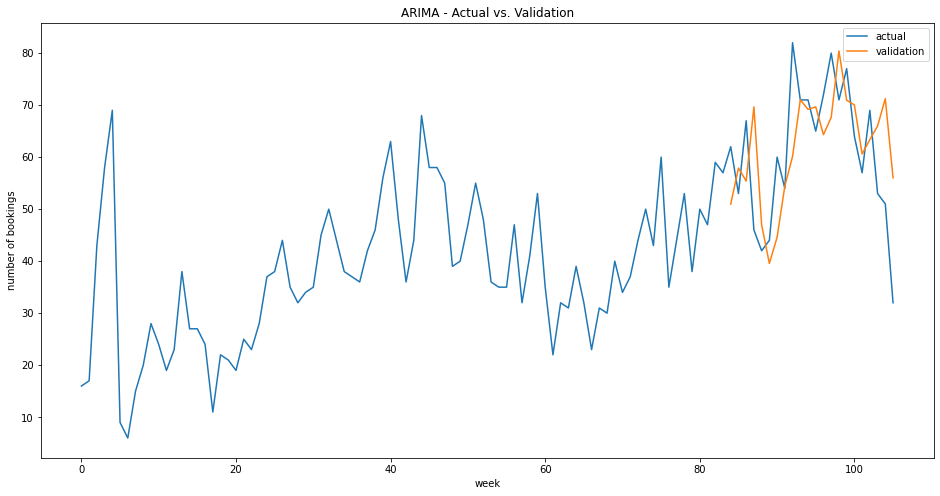

In [38]:
df [['booking_number']]. plot (figsize= (16,8))
plt.plot(validation_data)
plt.legend(['actual','validation'])
plt.xlabel('week')
plt.ylabel('number of bookings')
plt.title('ARIMA - Actual vs. Validation')
plt.show()

In [39]:
forecast_data = ARIMAresult.forecast(steps=5)

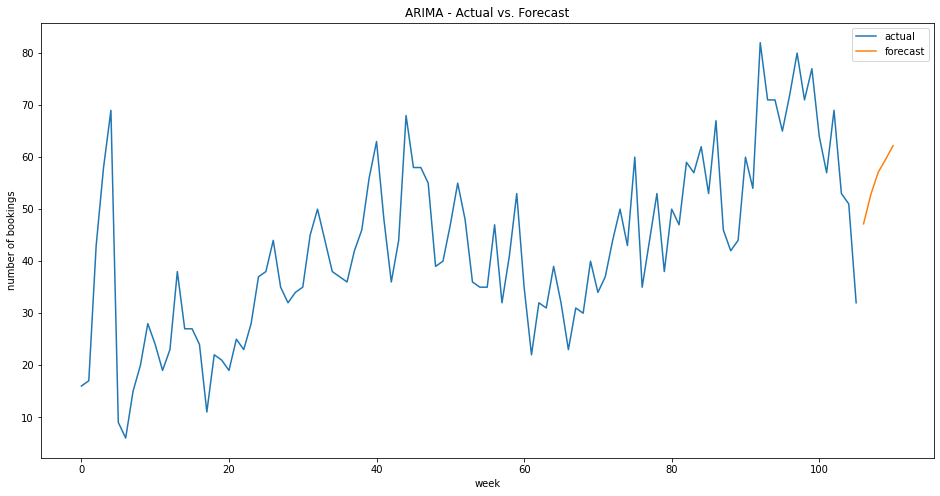

In [40]:
df [['booking_number']]. plot (figsize= (16,8))
plt.plot(forecast_data)
plt.legend(['actual','forecast'])
plt.xlabel('week')
plt.ylabel('number of bookings')
plt.title('ARIMA - Actual vs. Forecast')
plt.show()

In [41]:
forecast_data

106    47.168251
107    52.858472
108    57.118396
109    59.584249
110    62.201226
dtype: float64

## Conculsion: 

The forecast for the number of bookings in October is **240**

**Explaination:** <br> October 2018 includes 4.5 weeks.<br>
**About 106th week**: The frist day of 106 week belongs to September, so I will using 47.17 - (47.17/6) = 39.31 as the number of count in week 53th. <br> **About 110th week**:There are 3 days belonging to October in week 110, therefore I will use 62.20 / 2 = 31.1 as number of count for week 57th.

The forecast of number of bookings in October is 240 (39.31 + 52.86 + 57.12 + 59.58 + 31.1 ≈ 240)

# 2. A/B Test For Layout of Checkout Page Changes

## Input test dataset

In [42]:
test = pd.read_csv("~/Desktop/test_data.csv")
test.head(10)

,ItineraryItemID,OrderDate,TravelDate,TravelerCount,BookingValue,IsCancelled,ChannelID,DeviceID,test
0,614273470,2016-11-16 00:00:00,2017-01-03 00:00:00,0,75.938813,1,1449,3574,1
1,614275727,2016-12-30 00:00:00,2016-12-31 00:00:00,0,21.492100,1,1128,3045,0
2,614273759,2017-11-15 00:00:00,2017-11-18 00:00:00,0,121.666039,1,1145,3574,0
3,614274453,2018-05-03 00:00:00,2018-05-08 00:00:00,0,68.612908,1,1449,3938,0
4,614272723,2018-08-22 00:00:00,2018-08-23 00:00:00,0,130.403183,1,1873,3938,0
5,614274939,2018-09-30 00:00:00,2018-09-30 00:00:00,0,73.684767,1,1200,3938,0
6,614273740,2016-10-01 00:00:00,2016-10-04 00:00:00,1,108.885777,0,1889,3574,1
7,614273879,2016-10-01 00:00:00,2016-10-02 00:00:00,1,22.002341,0,1889,3574,0
8,614274093,2016-10-02 00:00:00,2016-10-03 00:00:00,1,76.266981,0,1215,3574,0
9,614274730,2016-10-07 00:00:00,2017-04-15 00:00:00,1,220.405902,0,1175,3045,1


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ItineraryItemID  4514 non-null   int64  
 1   OrderDate        4514 non-null   object 
 2   TravelDate       4514 non-null   object 
 3   TravelerCount    4514 non-null   int64  
 4   BookingValue     4514 non-null   float64
 5   IsCancelled      4514 non-null   int64  
 6   ChannelID        4514 non-null   int64  
 7   DeviceID         4514 non-null   int64  
 8   test             4514 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 317.5+ KB


## Data Preparation

The dataset is already cleaned. However, Based on observation, there are bookings with 0 traveler and they are all cancelled. This type of bookings could be because of incidenct and there are only 6 rows, therefore I will **drop rows with travelercount = 0**

In [44]:
test.drop( test[ test['TravelerCount'] == 0 ].index, inplace=True)
test

,ItineraryItemID,OrderDate,TravelDate,TravelerCount,BookingValue,IsCancelled,ChannelID,DeviceID,test
6,614273740,2016-10-01 00:00:00,2016-10-04 00:00:00,1,108.885777,0,1889,3574,1
7,614273879,2016-10-01 00:00:00,2016-10-02 00:00:00,1,22.002341,0,1889,3574,0
8,614274093,2016-10-02 00:00:00,2016-10-03 00:00:00,1,76.266981,0,1215,3574,0
9,614274730,2016-10-07 00:00:00,2017-04-15 00:00:00,1,220.405902,0,1175,3045,1
10,614274345,2016-10-10 00:00:00,2016-10-21 00:00:00,1,99.243677,0,1215,3209,0
...,...,...,...,...,...,...,...,...,...
4509,614277413,2018-05-10 00:00:00,2018-06-03 00:00:00,10,267.015284,0,1128,3045,0
4510,614277437,2018-04-15 00:00:00,2018-04-21 00:00:00,11,474.521404,1,1873,3758,0
4511,614276526,2018-07-07 00:00:00,2018-08-02 00:00:00,11,173.756968,0,1889,3574,1
4512,614273621,2017-06-09 00:00:00,2017-06-16 00:00:00,12,283.581674,0,1145,3045,0


In order to be more close to normal distribution, check cancellation rate by day, year_weeknumber, and week_number

In [45]:
test['Date']= pd.to_datetime(test['OrderDate'])
test

,ItineraryItemID,OrderDate,TravelDate,TravelerCount,BookingValue,IsCancelled,ChannelID,DeviceID,test,Date
6,614273740,2016-10-01 00:00:00,2016-10-04 00:00:00,1,108.885777,0,1889,3574,1,2016-10-01
7,614273879,2016-10-01 00:00:00,2016-10-02 00:00:00,1,22.002341,0,1889,3574,0,2016-10-01
8,614274093,2016-10-02 00:00:00,2016-10-03 00:00:00,1,76.266981,0,1215,3574,0,2016-10-02
9,614274730,2016-10-07 00:00:00,2017-04-15 00:00:00,1,220.405902,0,1175,3045,1,2016-10-07
10,614274345,2016-10-10 00:00:00,2016-10-21 00:00:00,1,99.243677,0,1215,3209,0,2016-10-10
...,...,...,...,...,...,...,...,...,...,...
4509,614277413,2018-05-10 00:00:00,2018-06-03 00:00:00,10,267.015284,0,1128,3045,0,2018-05-10
4510,614277437,2018-04-15 00:00:00,2018-04-21 00:00:00,11,474.521404,1,1873,3758,0,2018-04-15
4511,614276526,2018-07-07 00:00:00,2018-08-02 00:00:00,11,173.756968,0,1889,3574,1,2018-07-07
4512,614273621,2017-06-09 00:00:00,2017-06-16 00:00:00,12,283.581674,0,1145,3045,0,2017-06-09


In [46]:
test['week_number_of_year'] = test['Date'].dt.week
test

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,ItineraryItemID,OrderDate,TravelDate,TravelerCount,BookingValue,IsCancelled,ChannelID,DeviceID,test,Date,week_number_of_year
6,614273740,2016-10-01 00:00:00,2016-10-04 00:00:00,1,108.885777,0,1889,3574,1,2016-10-01,39
7,614273879,2016-10-01 00:00:00,2016-10-02 00:00:00,1,22.002341,0,1889,3574,0,2016-10-01,39
8,614274093,2016-10-02 00:00:00,2016-10-03 00:00:00,1,76.266981,0,1215,3574,0,2016-10-02,39
9,614274730,2016-10-07 00:00:00,2017-04-15 00:00:00,1,220.405902,0,1175,3045,1,2016-10-07,40
10,614274345,2016-10-10 00:00:00,2016-10-21 00:00:00,1,99.243677,0,1215,3209,0,2016-10-10,41
...,...,...,...,...,...,...,...,...,...,...,...
4509,614277413,2018-05-10 00:00:00,2018-06-03 00:00:00,10,267.015284,0,1128,3045,0,2018-05-10,19
4510,614277437,2018-04-15 00:00:00,2018-04-21 00:00:00,11,474.521404,1,1873,3758,0,2018-04-15,15
4511,614276526,2018-07-07 00:00:00,2018-08-02 00:00:00,11,173.756968,0,1889,3574,1,2018-07-07,27
4512,614273621,2017-06-09 00:00:00,2017-06-16 00:00:00,12,283.581674,0,1145,3045,0,2017-06-09,23


In [47]:
test['year'] = test['Date'].dt.year
test

,ItineraryItemID,OrderDate,TravelDate,TravelerCount,BookingValue,IsCancelled,ChannelID,DeviceID,test,Date,week_number_of_year,year
6,614273740,2016-10-01 00:00:00,2016-10-04 00:00:00,1,108.885777,0,1889,3574,1,2016-10-01,39,2016
7,614273879,2016-10-01 00:00:00,2016-10-02 00:00:00,1,22.002341,0,1889,3574,0,2016-10-01,39,2016
8,614274093,2016-10-02 00:00:00,2016-10-03 00:00:00,1,76.266981,0,1215,3574,0,2016-10-02,39,2016
9,614274730,2016-10-07 00:00:00,2017-04-15 00:00:00,1,220.405902,0,1175,3045,1,2016-10-07,40,2016
10,614274345,2016-10-10 00:00:00,2016-10-21 00:00:00,1,99.243677,0,1215,3209,0,2016-10-10,41,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
4509,614277413,2018-05-10 00:00:00,2018-06-03 00:00:00,10,267.015284,0,1128,3045,0,2018-05-10,19,2018
4510,614277437,2018-04-15 00:00:00,2018-04-21 00:00:00,11,474.521404,1,1873,3758,0,2018-04-15,15,2018
4511,614276526,2018-07-07 00:00:00,2018-08-02 00:00:00,11,173.756968,0,1889,3574,1,2018-07-07,27,2018
4512,614273621,2017-06-09 00:00:00,2017-06-16 00:00:00,12,283.581674,0,1145,3045,0,2017-06-09,23,2017


## Devide control/test group

In [48]:
test[['IsCancelled','test']].groupby(['test']).sum()

,IsCancelled
test,
0,155
1,174


In [49]:
test[['IsCancelled','test']].groupby(['test']).count()

,IsCancelled
test,
0,2235
1,2273


**Average Cancellation Rate for control group is 6.9%** <br>
**Average Cancellation Rate for test group is 7.7%**

### Control Group

In [50]:
control_group = test[test['test'] == 0]
control_group

,ItineraryItemID,OrderDate,TravelDate,TravelerCount,BookingValue,IsCancelled,ChannelID,DeviceID,test,Date,week_number_of_year,year
7,614273879,2016-10-01 00:00:00,2016-10-02 00:00:00,1,22.002341,0,1889,3574,0,2016-10-01,39,2016
8,614274093,2016-10-02 00:00:00,2016-10-03 00:00:00,1,76.266981,0,1215,3574,0,2016-10-02,39,2016
10,614274345,2016-10-10 00:00:00,2016-10-21 00:00:00,1,99.243677,0,1215,3209,0,2016-10-10,41,2016
16,614276059,2016-10-18 00:00:00,2016-10-23 00:00:00,1,20.010705,0,1949,3045,0,2016-10-18,42,2016
18,614273481,2016-10-19 00:00:00,2017-01-05 00:00:00,1,91.434950,1,1145,3574,0,2016-10-19,42,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
4508,614274605,2018-02-11 00:00:00,2018-03-19 00:00:00,10,550.680876,0,1355,3574,0,2018-02-11,6,2018
4509,614277413,2018-05-10 00:00:00,2018-06-03 00:00:00,10,267.015284,0,1128,3045,0,2018-05-10,19,2018
4510,614277437,2018-04-15 00:00:00,2018-04-21 00:00:00,11,474.521404,1,1873,3758,0,2018-04-15,15,2018
4512,614273621,2017-06-09 00:00:00,2017-06-16 00:00:00,12,283.581674,0,1145,3045,0,2017-06-09,23,2017


**Cg1 = day**   (663 row)

**Cg2 = year + number of week** (105 row)

**Cg3 = number of week** (52 row)

In [51]:
cg1 = control_group.groupby(['Date']).agg({'IsCancelled':lambda x: x.sum() / x.count()})
cg1 = cg1.rename(columns = {"IsCancelled":"cancellation_rate" })
cg1.head()

,cancellation_rate
Date,
2016-10-01,0.0
2016-10-02,0.0
2016-10-06,0.0
2016-10-07,0.0
2016-10-10,0.0


In [52]:
cg2 = control_group.groupby(['year','week_number_of_year']).agg({'IsCancelled':lambda x: x.sum() / x.count()})
cg2 = cg2.rename(columns = {"IsCancelled":"cancellation_rate" })
cg2.head()

cancellation_rate
year week_number_of_year                   
2016 39                            0.000000
     40                            0.000000
     41                            0.000000
     42                            0.083333
     43                            0.000000

In [53]:
cg3 = control_group.groupby(['week_number_of_year']).agg({'IsCancelled':lambda x: x.sum() / x.count()})
cg3 = cg3.rename(columns = {"IsCancelled":"cancellation_rate" })
cg3.head()

,cancellation_rate
week_number_of_year,
1,0.055556
2,0.181818
3,0.107143
4,0.083333
5,0.085714


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellation_rate', ylabel='Density'>

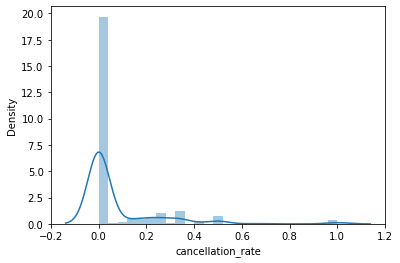

In [54]:
sns.distplot(cg1.cancellation_rate)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellation_rate', ylabel='Density'>

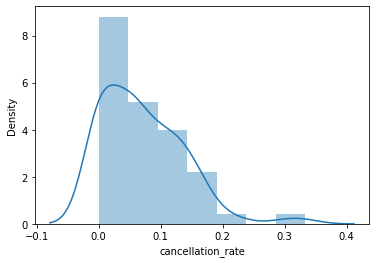

In [55]:
sns.distplot(cg2.cancellation_rate)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellation_rate', ylabel='Density'>

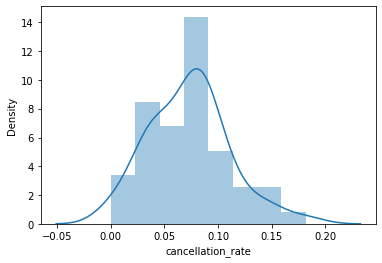

In [56]:
sns.distplot(cg3.cancellation_rate)

#### Conlusion:

When the control group is grouped by number of weeks (52 row), the result is more colse to nomal distribution, so we group control group by week and run evaluation.

### Test Group

In [57]:
test_group = test[test['test'] == 1]
test_group

,ItineraryItemID,OrderDate,TravelDate,TravelerCount,BookingValue,IsCancelled,ChannelID,DeviceID,test,Date,week_number_of_year,year
6,614273740,2016-10-01 00:00:00,2016-10-04 00:00:00,1,108.885777,0,1889,3574,1,2016-10-01,39,2016
9,614274730,2016-10-07 00:00:00,2017-04-15 00:00:00,1,220.405902,0,1175,3045,1,2016-10-07,40,2016
11,614275796,2016-10-11 00:00:00,2016-10-15 00:00:00,1,177.155497,0,1145,3574,1,2016-10-11,41,2016
12,614273714,2016-10-13 00:00:00,2016-10-18 00:00:00,1,24.128317,0,1873,3045,1,2016-10-13,41,2016
13,614275732,2016-10-13 00:00:00,2016-10-17 00:00:00,1,66.918651,0,1128,3209,1,2016-10-13,41,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
4503,614276876,2018-05-05 00:00:00,2018-07-05 00:00:00,9,645.396227,0,1449,3758,1,2018-05-05,18,2018
4504,614277242,2018-05-28 00:00:00,2018-07-30 00:00:00,9,742.098039,0,1873,3209,1,2018-05-28,22,2018
4505,614274508,2018-06-07 00:00:00,2018-06-12 00:00:00,9,514.574840,1,1873,3209,1,2018-06-07,23,2018
4506,614273894,2018-07-24 00:00:00,2018-08-09 00:00:00,9,450.355956,0,1355,3209,1,2018-07-24,30,2018


**Cg1 = day**   (656 row)

**Cg2 = year + number of week** (105 row)

**Cg3 = number of week** (52 row)

In [58]:
tg1 = test_group.groupby(['Date']).agg({'IsCancelled':lambda x: x.sum() / x.count()})
tg1 = tg1.rename(columns = {"IsCancelled":"cancellation_rate" })
tg1.head()

,cancellation_rate
Date,
2016-10-01,0.0
2016-10-03,0.0
2016-10-04,0.0
2016-10-05,0.0
2016-10-07,0.0


In [59]:
tg2 = test_group.groupby(['year','week_number_of_year']).agg({'IsCancelled':lambda x: x.sum() / x.count()})
tg2 = tg2.rename(columns = {"IsCancelled":"cancellation_rate" })
tg2.head()

cancellation_rate
year week_number_of_year                   
2016 39                            0.000000
     40                            0.000000
     41                            0.000000
     42                            0.066667
     43                            0.055556

In [60]:
tg3 = test_group.groupby(['week_number_of_year']).agg({'IsCancelled':lambda x: x.sum() / x.count()})
tg3 = tg3.rename(columns = {"IsCancelled":"cancellation_rate" })
tg3.head()

,cancellation_rate
week_number_of_year,
1,0.000000
2,0.066667
3,0.131579
4,0.035714
5,0.062500


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellation_rate', ylabel='Density'>

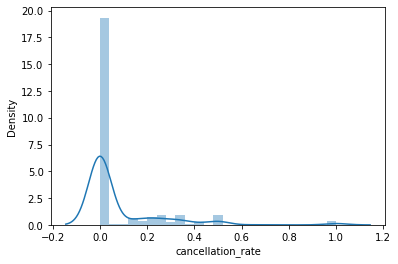

In [61]:
sns.distplot(tg1.cancellation_rate)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellation_rate', ylabel='Density'>

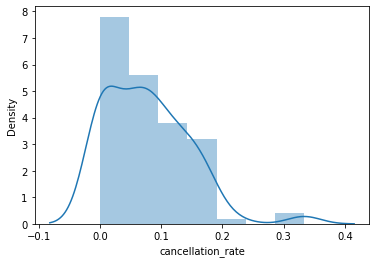

In [62]:
sns.distplot(tg2.cancellation_rate)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellation_rate', ylabel='Density'>

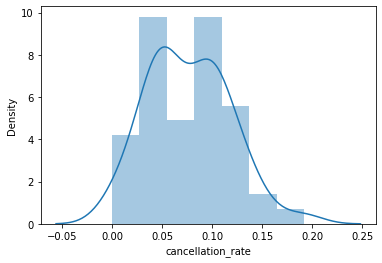

In [63]:
sns.distplot(tg3.cancellation_rate)

####  Conlusion:
When test group is grouped by number of weeks (52 row), the result is more colse to nomal distribution, so we use weekly data to run evaluation.

In [64]:
t_stat, p_val= ss.ttest_ind(tg3.cancellation_rate,cg3.cancellation_rate)
t_stat , p_val

(0.48334057012688164, 0.6298898663532023)

Since p value is larger than 0.05, so we fail to reject null hypothesis which means that we do not have confidence to say that there are is a significant difference between control and testing groups.